In [1]:
import pytesseract
from PIL import Image
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import json
import spacy

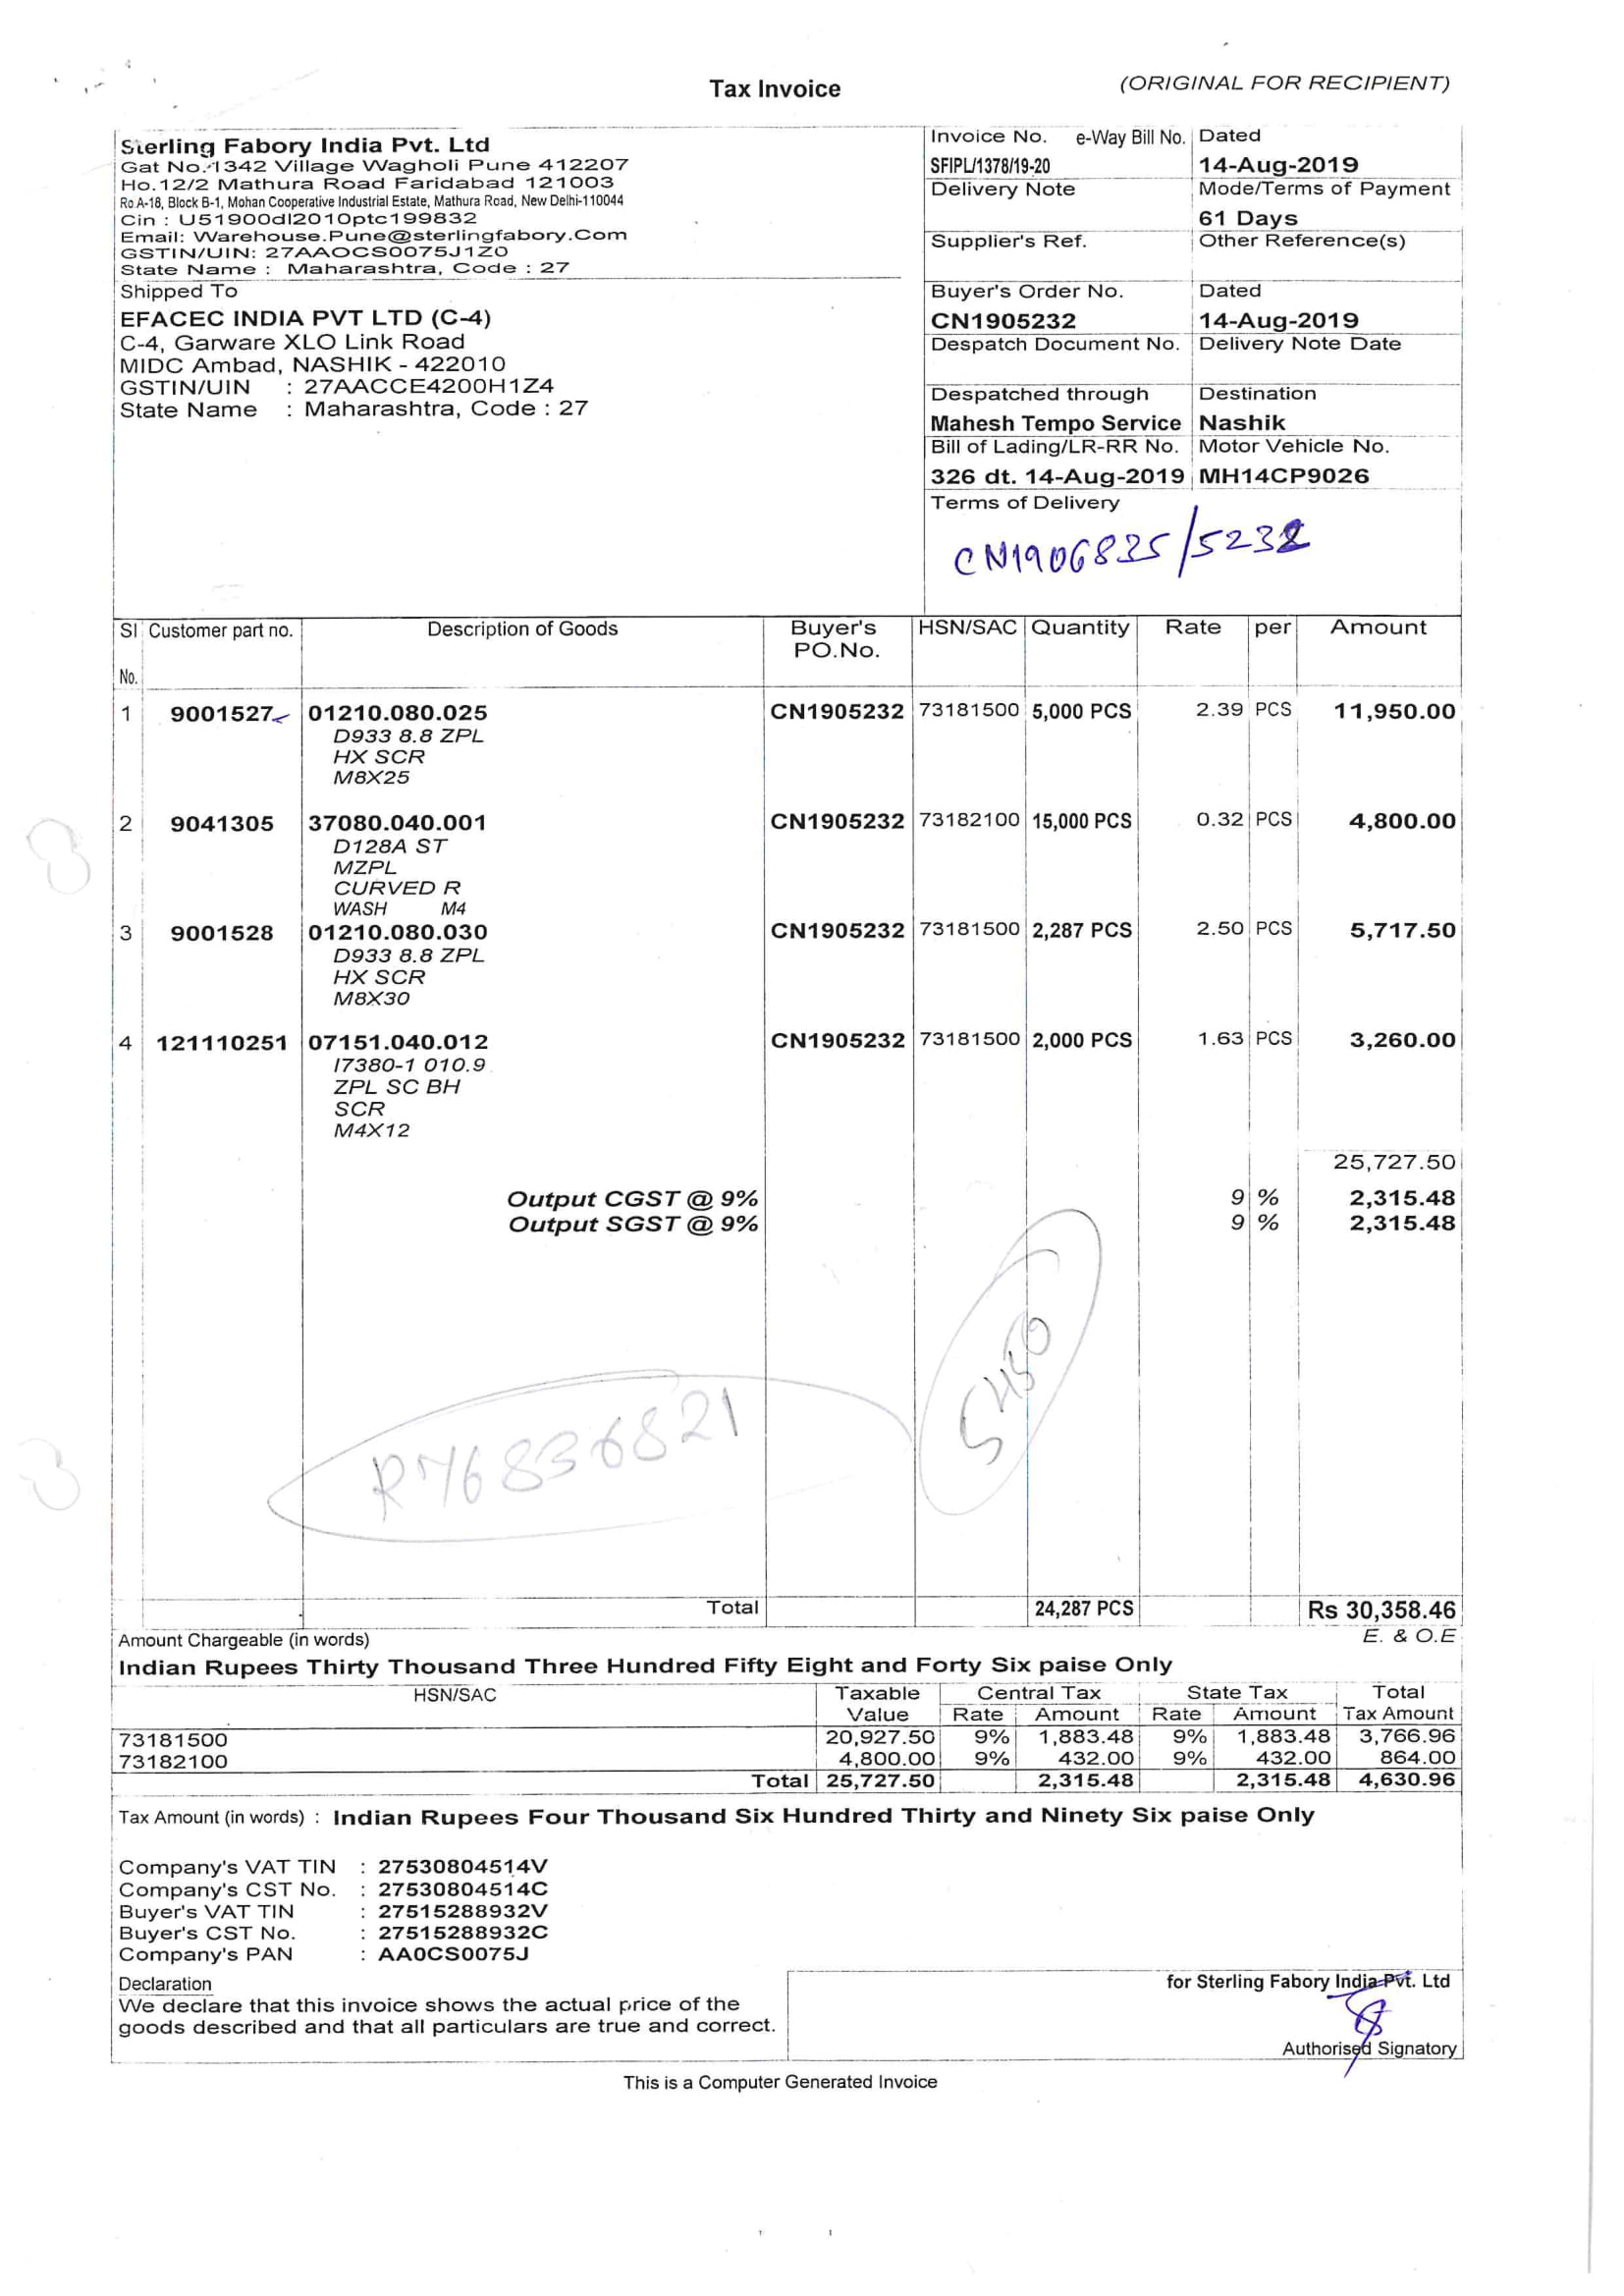

In [2]:
image_path="D:\python project\invoice extraction\image6.jpg"
image = Image.open(image_path)
image

In [3]:
custom_config = r'-l eng --oem 3 --psm 6' 
text = pytesseract.image_to_string(image,config=custom_config)

In [4]:
text

"a a Tax Invoice (ORIGINAL FOR RECIPIENT)\n\\Sierling Fabory India Pvt.Ltd — Invoice No. — ¢-Way Bill No. | Dated\n|Gat No-1342 Village Waghott Pune 412207 SFIPL/1378/19-20 |14-Aug-2019\nHo.12/2 Mathura Road Faridabad 121003 Delivery Nets thAsda/Toane oF Pau\n|Roai, Block 6-1, Mohan Cooperative novel Estate, Mathura Road, New Deli-1 10044 Delivery Note Mode/Terms of Payment\n|gin : US1900d12010pte199832 61 Days\nEse eS al Supplier's Ref. ‘Other Reference(s) |\neo Name: Maharashtra, Code: 2700000 _ j\n{Shipped To Buyers OrderNo. ‘Dated 7\nEFACEC INDIA PVT LTD (C-4) CN1905232 ____ |14-Aug-2019\nC-4, Garware XLO Link Road Despatch Document No. Delivery Note Date\nMIDC Ambad, NASHIK - 422010 | |\n|GSTIN/UIN  : 27AACCE4200H1Z4 Ssesatensa hroush ~~ | Destinati ——— —|\n|State Name : Maharashtra, Code : 27 Despatched tarough: [Destination |\nMahesh Tempo Service Nashik __ |\n| Bill of Lading/LR-RR No. | Motor Vehicle No. |\n326 dt. 14-Aug-2019 |MH14CP9026\n| Terms of Delivery\n| 23% |\n|\n| |\

In [5]:
def remove_unwanted_characters(text):
    pattern = r'[^a-z0-9\s:/,.]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

In [6]:
def normalize_whitespace(cleaned_text):
    cleaned_text = ' '.join(text.split())
    return cleaned_text


In [7]:
def escape_special_characters(text):
    special_characters = r'[-[\]{}()*+!<=:|,.^$?# \t\n]'
    cleaned_text = re.sub(f'([{special_characters}])', r'\\\1', text)
    return cleaned_text


In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17pra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\17pra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17pra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def preprocess_for_regex(text):
    cleaned_text = text.lower()
    cleaned_text = remove_unwanted_characters(cleaned_text)
    cleaned_text = normalize_whitespace(cleaned_text)
    cleaned_text = escape_special_characters(cleaned_text)
    tokens = word_tokenize(cleaned_text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words]
    return cleaned_text


In [10]:
data = preprocess_for_regex(text)

C:\Users\17pra\AppData\Local\Temp\ipykernel_10704\1461645815.py:3: FutureWarning: Possible nested set at position 2
  cleaned_text = re.sub(f'([{special_characters}])', r'\\\1', text)


In [11]:
data

"a a Tax Invoice (ORIGINAL FOR RECIPIENT) \\Sierling Fabory India Pvt.Ltd — Invoice No. — ¢-Way Bill No. | Dated |Gat No-1342 Village Waghott Pune 412207 SFIPL/1378/19-20 |14-Aug-2019 Ho.12/2 Mathura Road Faridabad 121003 Delivery Nets thAsda/Toane oF Pau |Roai, Block 6-1, Mohan Cooperative novel Estate, Mathura Road, New Deli-1 10044 Delivery Note Mode/Terms of Payment |gin : US1900d12010pte199832 61 Days Ese eS al Supplier's Ref. ‘Other Reference(s) | eo Name: Maharashtra, Code: 2700000 _ j {Shipped To Buyers OrderNo. ‘Dated 7 EFACEC INDIA PVT LTD (C-4) CN1905232 ____ |14-Aug-2019 C-4, Garware XLO Link Road Despatch Document No. Delivery Note Date MIDC Ambad, NASHIK - 422010 | | |GSTIN/UIN : 27AACCE4200H1Z4 Ssesatensa hroush ~~ | Destinati ——— —| |State Name : Maharashtra, Code : 27 Despatched tarough: [Destination | Mahesh Tempo Service Nashik __ | | Bill of Lading/LR-RR No. | Motor Vehicle No. | 326 dt. 14-Aug-2019 |MH14CP9026 | Terms of Delivery | 23% | | | | Sl Customer part no. 

In [12]:
type(data)

str

In [13]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(data)

In [26]:
data=data

# Extract invoice 
invoice_number_pattern = re.compile(r"(?:Invoice\s*No\.|Serial\s*Number\s*of\s*Invoice|Invoice\s*Serial\s*No\.|Invoice\s*No|Tax.\s*Inv.\s*No.)\s*:\s*(\S+)|(?:Invoice\s*No\.|Serial\s*Number\s*of\s*Invoice|Invoice\s*Serial\s*No\.|Invoice\s*No|Tax.\s*Inv.\s*No.)\s*(\S+)", re.IGNORECASE)

match = invoice_number_pattern.search(data)
invoice_number = match.group(1) if match else ""
    
# Extract vendor code
vendor_code_match = re.search(r"Vendor Code\s*:\s*(\S+)", data, re.IGNORECASE)
vendor_code = vendor_code_match.group(1) if vendor_code_match else ""

# Extract date of invoice
date_of_invoice_pattern = re.compile(r"(?:dated|invoice\s*date|date\s*of\s*invoice|order\s*date|date)\s*:\s*(\S+)", re.IGNORECASE)
date_of_invoice_match = date_of_invoice_pattern.search(data)
date_of_invoice = date_of_invoice_match.group(1) if date_of_invoice_match else ""


# Extract address
address_match = re.search(r"Address\s*:\s*([^0-9]+)", data, re.IGNORECASE)
address = address_match.group(1).strip() if address_match else ""

#Extracted GST
gstno_pattern= re.compile(r"(?:gstin/uin|gstin|gst\s*No|gstin\s*No|gstn)\s*:\s*(\S+)", re.IGNORECASE)
gstno_match=gstno_pattern.search(data)  
gstno=gstno_match.group(1) if gstno_match else ""

# Tax Amount
totalamtpattern=  re.compile(r"(?i)(?:(?:Tax\s*Amount|Amount\s*Charge|Invoice\s*Value)\s*\(in\s*words\)|Total\s*Invoice\s*Value\s*\(in\s*words\)|Total\s*Amount)\s*:\s*([a-zA-Z\s]+)", re.IGNORECASE)
totalamtmatch= totalamtpattern.search(data)
totalamt=totalamtmatch.group(1) if totalamtmatch else ""

# Extracting PO number
po_number_pattern = re.compile(r"(?:PO No\.|Purchase\s*Order\s*No\.)\s*:\s*([^ ]+)", re.IGNORECASE)
po_number_match = po_number_pattern.search(data)
po_number = po_number_match.group(1) if po_number_match else ""

# Extracting buyer name
buyer_name_pattern = re.compile(r"(?:Buyer|Details\s*of\s*Receiver|details\s*Consignee|Consignee|Shipped To|Details\s*of\s*Recipient|Details\s*of\s*Dilvery|Billed to)\s*([^,]+)", re.IGNORECASE)
buyer_name_match = buyer_name_pattern.search(data)
buyer_name = buyer_name_match.group(1) if buyer_name_match else ""

#Extracting Vendor Name
keywords_to_check = ["pvt ltd", "private limited","pvt.","ltd.","(pvt.)"]
organization_names = []

for ent in doc.ents:
    if ent.label_ == "ORG" and any(keyword in ent.text.lower() for keyword in keywords_to_check):
        organization_names.append(ent.text)
        break  # Stop processing after finding the first organization name

   





In [27]:
extracted_data = {
    "Invoice Number": invoice_number,
    "Vendor Code": vendor_code,
    "Date of Invoice": date_of_invoice,
    "Address": address,
    "GST NO":gstno,
    "Total Amount": totalamt,
    "PO No": po_number,
    "Buyer Name": buyer_name,
    "Vendor name": organization_names
    
}



In [28]:
print(json.dumps(extracted_data, indent=4))

{
    "Invoice Number": null,
    "Vendor Code": "",
    "Date of Invoice": "",
    "Address": "",
    "GST NO": "27AACCE4200H1Z4",
    "Total Amount": "Indian Rupees Four Thousand Six Hundred Thirty and Ninety Six paise Only Company",
    "PO No": "",
    "Buyer Name": "Buyers OrderNo. \u2018Dated 7 EFACEC INDIA PVT LTD (C-4) CN1905232 ____ |14-Aug-2019 C-4",
    "Vendor name": [
        "EFACEC INDIA PVT LTD"
    ]
}


In [29]:
output_filename = "extracted_data6.json"
with open(output_filename, "w") as json_file:
    json.dump(extracted_data, json_file, indent=4)